In [45]:
import requests
from tqdm.auto import tqdm
import json
import time
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url_1 = f'https://api.hh.ru/vacancies?employer_id={sber}&per_page={num_per_page}'

In [22]:
res = requests.get(url_1)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [32]:
all_vacancy_ids= []
for i in tqdm(range(num_pages)):
    url_2 = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url_2)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

A Jupyter Widget

In [60]:
# сохранение в файл
file_dir='D:\\Дима\\Учеба\\Python\\DA.SberUniversity\\Lesson1\\hometask_L1\\hometask'
file_name='all_vacancy_ids.txt'
with open(file_dir+'\\'+file_name,'w') as f:
    for i,v_id in enumerate(all_vacancy_ids):
        if i+1<len(all_vacancy_ids):
            f.write(v_id+'\n')
        else:
            f.write(v_id)

In [ ]:
# 1. Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# 2. Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# 3. Создайте аналогичный vacancy DataFrame только добавьте поле skills
# 4. Переведите даты публикаций в datetime
# 5. Постройте график опубликованных вакансий по датам
# 6. Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# 7. Найдите те вакансии с использованием python, которые вам интересны
# 8. Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# 9. Постройте график наиболее востребованных вакансий

# Task 1

In [345]:
# не придумал, как обойти

# Task 2

In [50]:
# создание функции, извлекающая полное описание вакансии
def full_vac_description(id_vacancy):
    url_full_vac_description='https://api.hh.ru/vacancies/'+ str(id_vacancy)
    full_vac_description=requests.get(url_full_vac_description).json()
    return [full_vac_description]

# формирование списка вакансий с полным описанием
full_vacancies_description_list=[]
for id_v in all_vacancy_ids:
    full_vacancies_description_list.extend(full_vac_description(id_v))

In [61]:
# запишем данные в txt-файл
file_name_full_descript='all_vacancy_with_description.txt'
with open(file_dir+'\\'+file_name_full_descript,'w',encoding='UTF-8') as f_full_descript:
    for descripted_vacancy in full_vacancies_description_list:
        f_full_descript.write(str(descripted_vacancy)+'/n')

# Task 3

In [173]:
import collections

In [112]:
skills_list=[]
for v in full_vacancies_description_list:
    for s in v.get('key_skills'):
            skills_list.extend(list(s.values()))

In [124]:
skills_list_lower=[str(s).lower() for s in skills_list]

In [129]:
skills_count_dic={}
for ls in set(skills_list_lower):
    skills_count_dic[ls]=skills_list_lower.count(ls)

In [174]:
skills_count_top_dic={}
for lst in set(skills_list_lower):
    if skills_list_lower.count(lst)>10:
        skills_count_top_dic[lst]=skills_list_lower.count(lst)
skills_count_top_dic_sort=collections.OrderedDict(sorted(skills_count_top_dic.items(),key=lambda x: x[1],reverse=True))

# Task 9

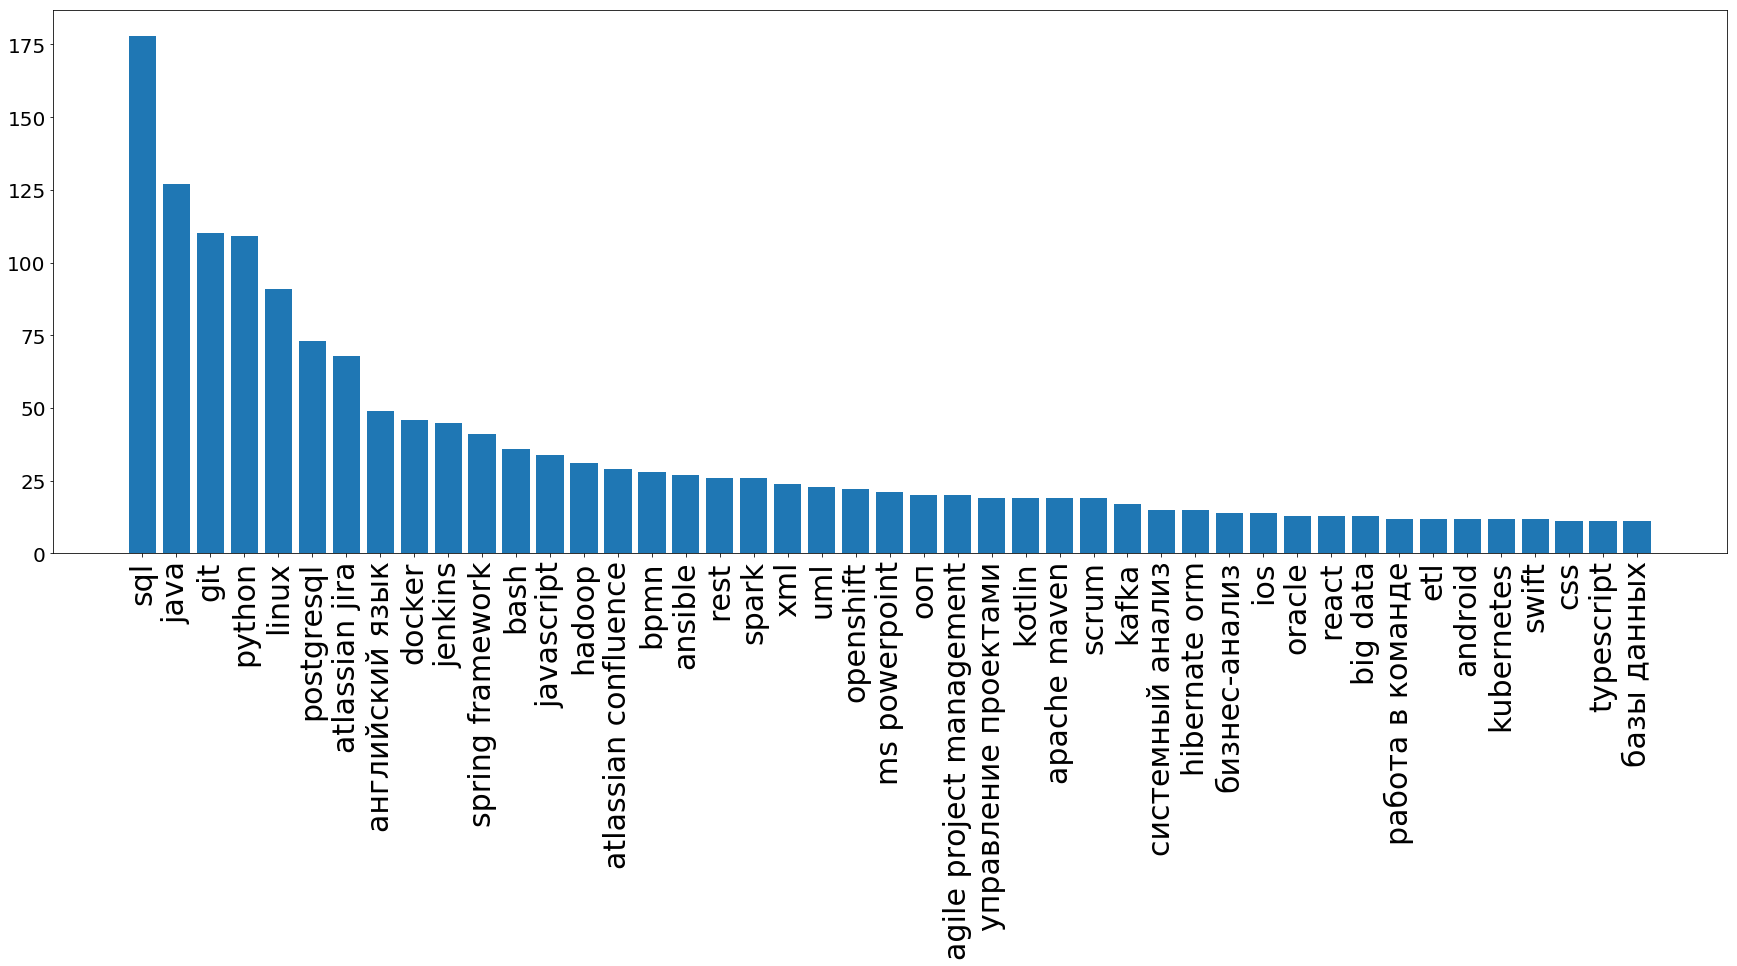

In [196]:
x_skills,heights_skills=list(skills_count_top_dic_sort.keys()),list(skills_count_top_dic_sort.values())
plt.figure(figsize=(30,10))
plt.bar(range(len(x_skills)),heights_skills)
plt.xticks(range(len(x_skills)),x_skills,rotation=90,size=30)
plt.yticks(size=20);

# Task 4

In [199]:
import datetime

In [249]:
vacancies_created_time=[]
for v in full_vacancies_description_list:
    ts=datetime.datetime.strptime(v.get('created_at')[:19].replace('T',' '),"%Y-%m-%d %H:%M:%S")
    vacancies_created_time.append(ts)
vacancies_created_time.sort()

In [254]:
vacancies_created_date=[datetime.datetime.date(ts_1) for ts_1 in vacancies_created_time]

# Task 5

In [266]:
distinct_dates_vacancies_created=[]
count_events_in_distinct_dates_vacancies_created=[]
for d in set(vacancies_created_date):
    distinct_dates_vacancies_created.append(datetime.datetime.strftime(d,"%Y-%m-%d"))
    count_events_in_distinct_dates_vacancies_created.append(list(vacancies_created_date).count(d))

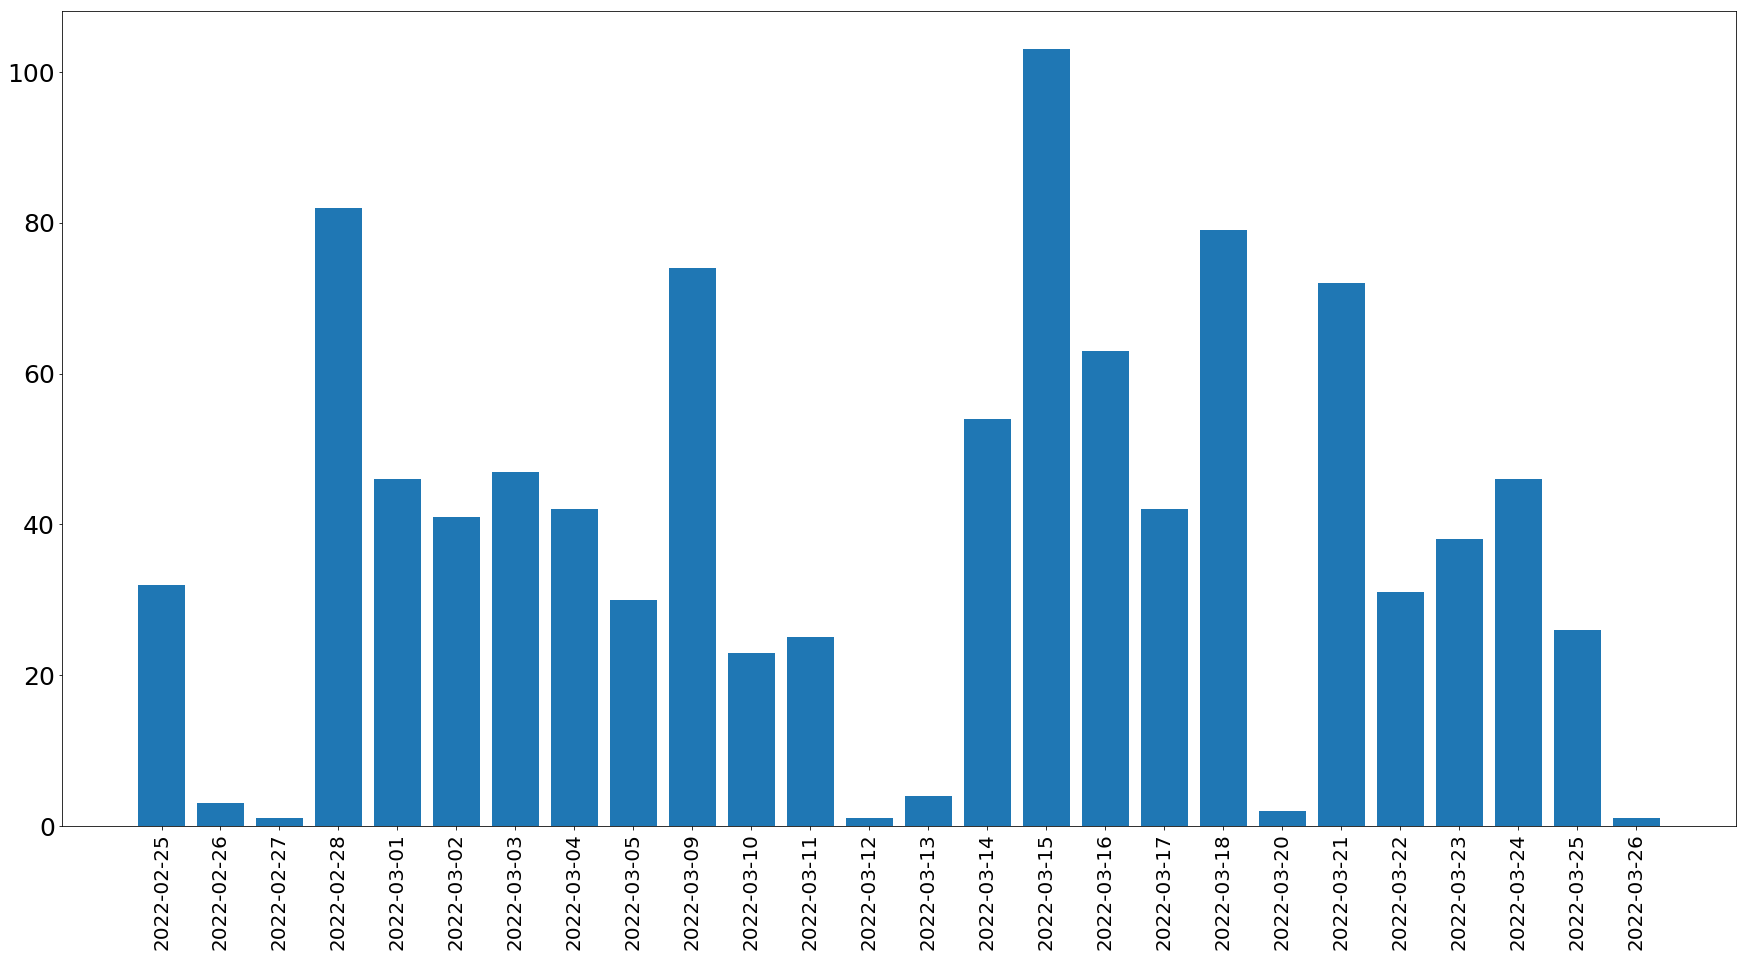

In [268]:
plt.figure(figsize=(30,15))
plt.bar(distinct_dates_vacancies_created,count_events_in_distinct_dates_vacancies_created)
plt.xticks(rotation=90,size=20)
plt.yticks(size=25);

# Task 6

In [273]:
days_of_week=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
vacancies_created_days_of_week=[days_of_week[d.weekday()] for d in vacancies_created_date]

In [275]:
vacancies_created_days_of_week_grouped={d_o_w:vacancies_created_days_of_week.count(d_o_w) for d_o_w in days_of_week}

In [276]:
vacancies_created_days_of_week_grouped

{'Fri': 204,
 'Mon': 208,
 'Sat': 35,
 'Sun': 7,
 'Thu': 158,
 'Tue': 180,
 'Wed': 216}

In [279]:
max(vacancies_created_days_of_week_grouped.values())

216

In [282]:
sorted(vacancies_created_days_of_week_grouped,key=lambda x: x[1],reverse=False)[0]

'Sat'

# Task 7

In [342]:
expected_region='Москва'
expected_role=['da','sql','aналитик данных','анализ данных','data analist','data analisys','python','business analitics','business analisys', 'business analist']
expected_salary=60000

In [343]:
interested_vacancies=[]
for vacancy in full_vacancies_description_list:
    vacancy_id=vacancy.get('id')
    vacancy_start_salary=vacancy.get('salary')
    if vacancy.get('area').get('name')==expected_region and len(set(expected_role)&set([v.get('name').lower() for v in vacancy.get('key_skills')]))>0 and vacancy_start_salary is not None and vacancy_start_salary.get('from') is not None and vacancy_start_salary.get('from')>expected_salary:
        interested_vacancies.append([vacancy_id,vacancy_start_salary.get('from'),set([v.get('name').lower() for v in vacancy.get('key_skills')])])

In [344]:
interested_vacancies

[['53287494',
  200000,
  {'ansible',
   'docker',
   'grafana',
   'jenkins',
   'kafka',
   'numpy',
   'postgresql',
   'python',
   'pytorch',
   'tensorflow'}],
 ['53310464',
  200000,
  {'ctl', 'git', 'greenplum', 'hadoop', 'python', 'spark', 'sql'}],
 ['53374832', 145000, {'git', 'java', 'openshift', 'spring framework', 'sql'}],
 ['54030202', 200000, {'ansible', 'docker', 'jenkins', 'linux', 'python'}],
 ['53417958',
  150000,
  {'atlassian confluence', 'atlassian jira', 'git', 'sql', 'xml'}],
 ['46361960', 150000, {'bash', 'hadoop', 'linux', 'postgresql', 'python'}],
 ['53091787', 200000, {'git', 'java', 'postgresql', 'sql', 'ооп'}],
 ['53217511', 150000, {'android', 'git', 'jenkins', 'python', 'xcode'}]]

# Task 8

In [349]:
skills_interested_vacancies=[]
skills_interested_vacancies_grouped={}

for v in interested_vacancies:
    skills_interested_vacancies.extend(list(v[2]))

for unique_v in set(skills_interested_vacancies):
    skills_interested_vacancies_grouped[unique_v]=skills_interested_vacancies.count(unique_v)

In [350]:
skills_interested_vacancies_grouped

{'android': 1,
 'ansible': 2,
 'atlassian confluence': 1,
 'atlassian jira': 1,
 'bash': 1,
 'ctl': 1,
 'docker': 2,
 'git': 5,
 'grafana': 1,
 'greenplum': 1,
 'hadoop': 2,
 'java': 2,
 'jenkins': 3,
 'kafka': 1,
 'linux': 2,
 'numpy': 1,
 'openshift': 1,
 'postgresql': 3,
 'python': 5,
 'pytorch': 1,
 'spark': 1,
 'spring framework': 1,
 'sql': 4,
 'tensorflow': 1,
 'xcode': 1,
 'xml': 1,
 'ооп': 1}

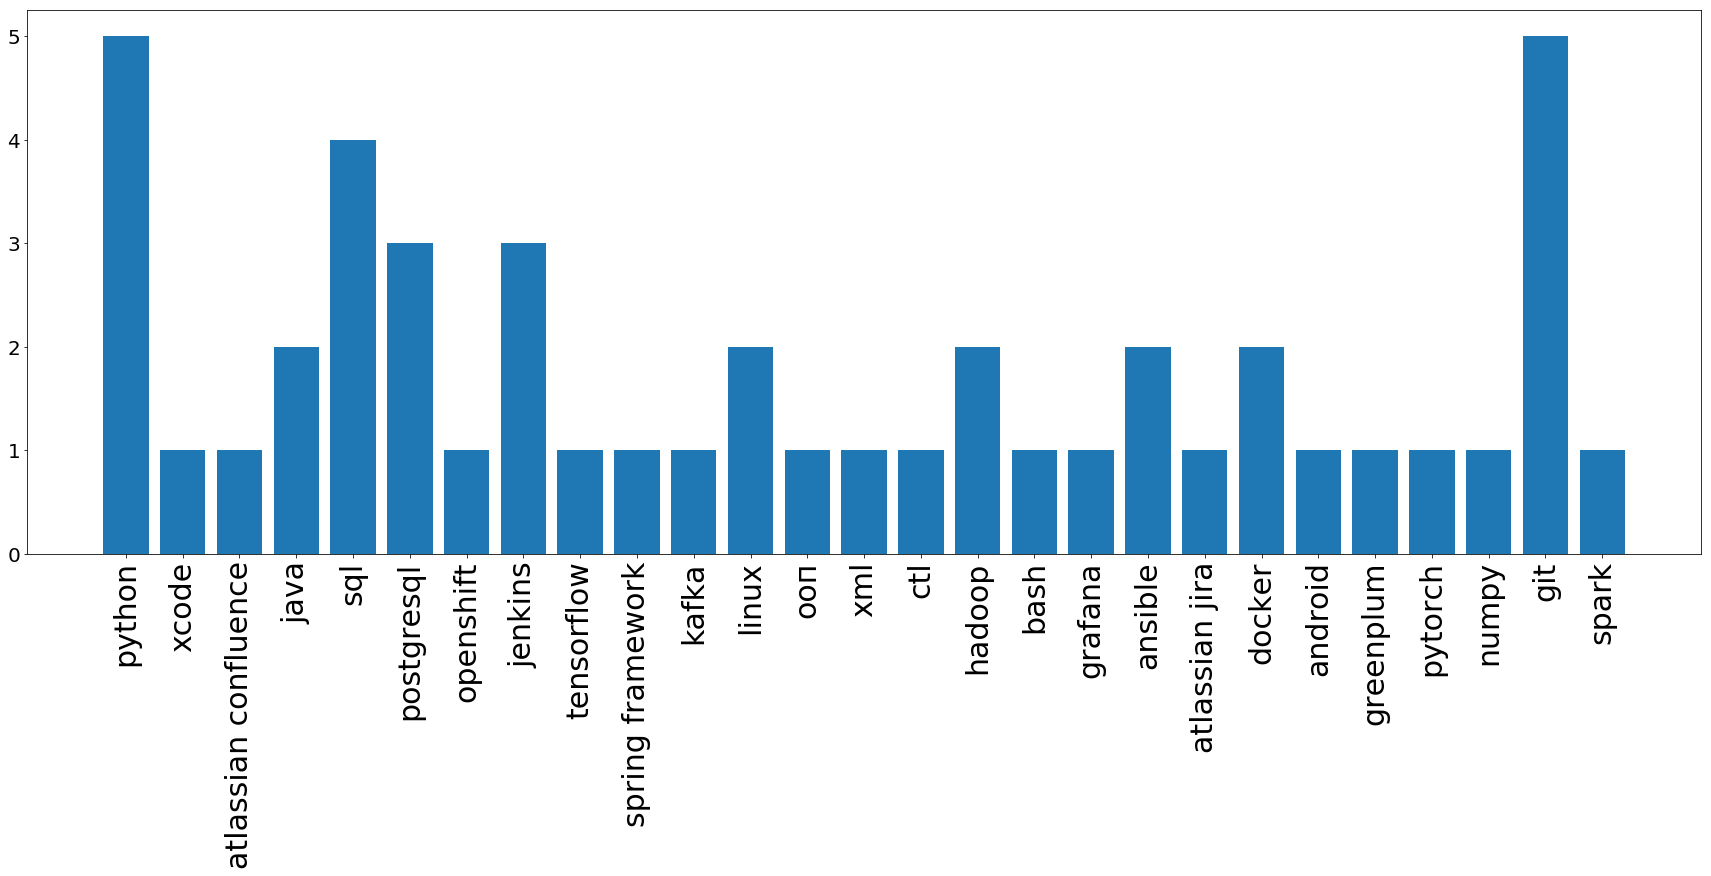

In [351]:
x_skills_intr,heights_skills_intr=list(skills_interested_vacancies_grouped.keys()),list(skills_interested_vacancies_grouped.values())
plt.figure(figsize=(30,10))
plt.bar(range(len(x_skills_intr)),heights_skills_intr)
plt.xticks(range(len(x_skills_intr)),x_skills_intr,rotation=90,size=30)
plt.yticks(size=20);